In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\rinuc\\Desktop\\DS assignments\\Assignment 16\\forestfires.csv")

In [58]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FFMC      517 non-null    float64
 1   DMC       517 non-null    float64
 2   DC        517 non-null    float64
 3   ISI       517 non-null    float64
 4   temp      517 non-null    float64
 5   RH        517 non-null    int64  
 6   wind      517 non-null    float64
 7   rain      517 non-null    float64
 8   dayfri    517 non-null    int64  
 9   daymon    517 non-null    int64  
 10  daysat    517 non-null    int64  
 11  daysun    517 non-null    int64  
 12  daythu    517 non-null    int64  
 13  daytue    517 non-null    int64  
 14  daywed    517 non-null    int64  
 15  monthapr  517 non-null    int64  
 16  monthaug  517 non-null    int64  
 17  monthdec  517 non-null    int64  
 18  monthfeb  517 non-null    int64  
 19  monthjan  517 non-null    int64  
 20  monthjul  517 non-null    int64 

In [4]:
numerical_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
numerical_data = df[numerical_columns]
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(numerical_data)
outliers = isolation_forest.predict(numerical_data)

C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Distribution of outliers')

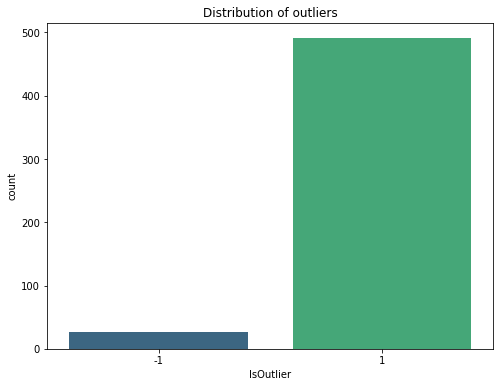

In [6]:
df['IsOutlier'] = outliers
outlier_df = df[df['IsOutlier'] == -1]

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='IsOutlier', data=df, palette='viridis')
plt.title('Distribution of outliers')

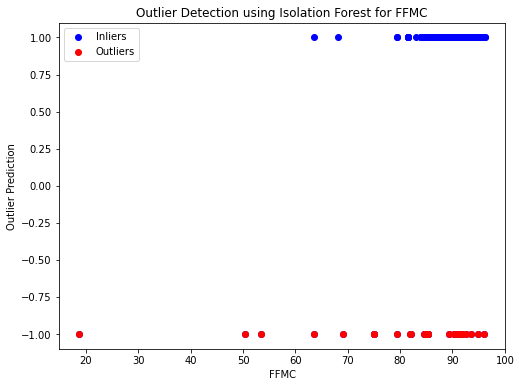

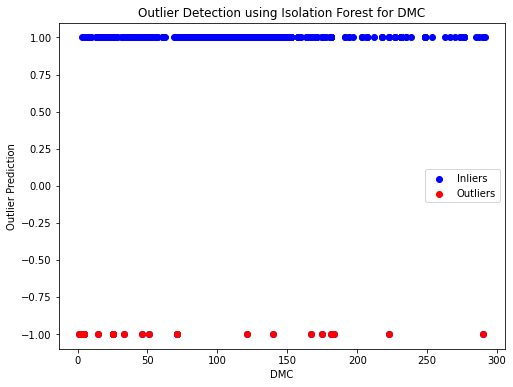

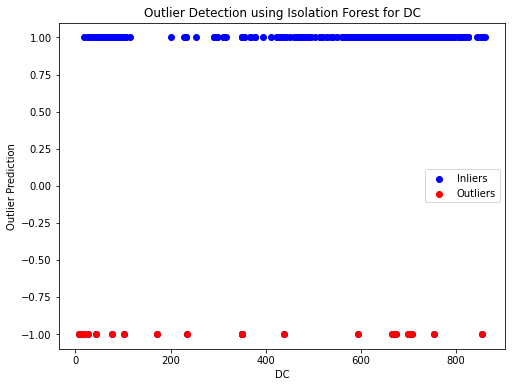

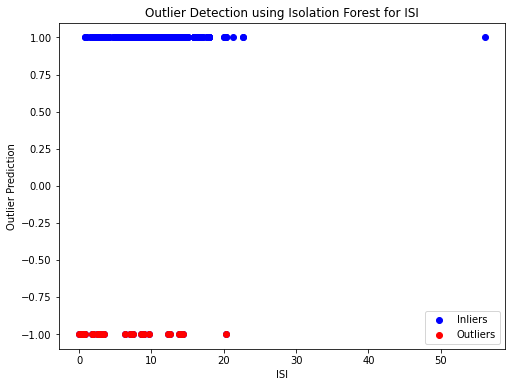

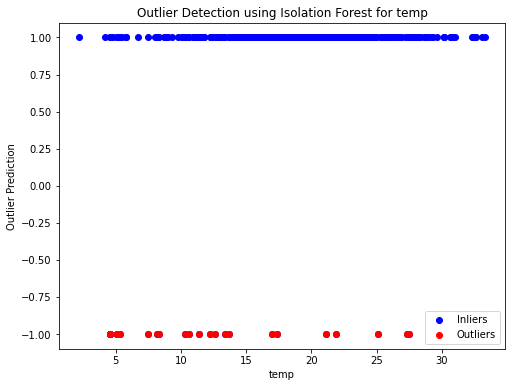

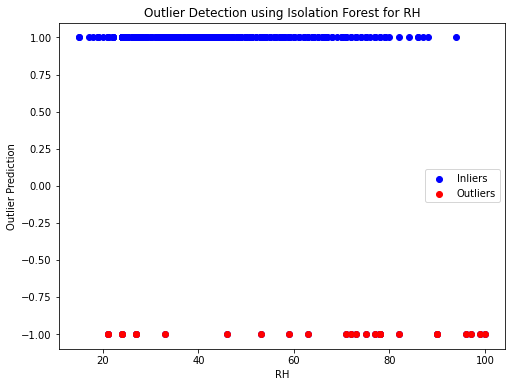

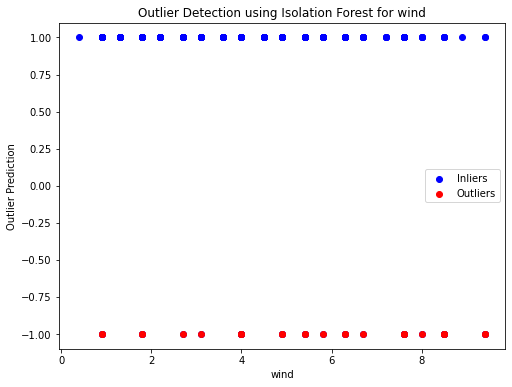

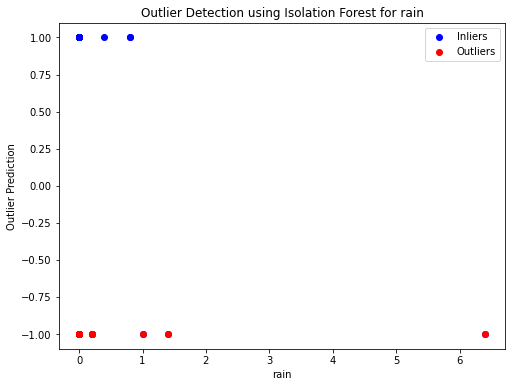

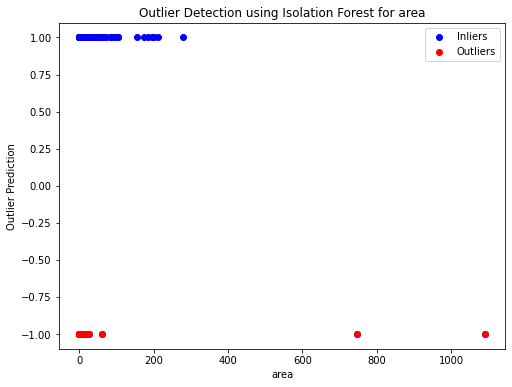

In [41]:
import matplotlib.pyplot as plt
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['IsOutlier'], color='blue', label='Inliers')
    plt.scatter(df[df['IsOutlier'] == -1][column], df[df['IsOutlier'] == -1]['IsOutlier'], color='red', label='Outliers')
    plt.xlabel(column)
    plt.ylabel('Outlier Prediction')
    plt.title(f'Outlier Detection using Isolation Forest for {column}')
    plt.legend()
    plt.show()

In [7]:
# Filter out the outliers
df_no_outliers = df[df['IsOutlier'] == 1]

df_no_outliers = df_no_outliers.drop('IsOutlier', axis=1)

In [8]:
y=df_no_outliers['area']
X=df_no_outliers.drop(['area','day','month','size_category'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 516
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FFMC      491 non-null    float64
 1   DMC       491 non-null    float64
 2   DC        491 non-null    float64
 3   ISI       491 non-null    float64
 4   temp      491 non-null    float64
 5   RH        491 non-null    int64  
 6   wind      491 non-null    float64
 7   rain      491 non-null    float64
 8   dayfri    491 non-null    int64  
 9   daymon    491 non-null    int64  
 10  daysat    491 non-null    int64  
 11  daysun    491 non-null    int64  
 12  daythu    491 non-null    int64  
 13  daytue    491 non-null    int64  
 14  daywed    491 non-null    int64  
 15  monthapr  491 non-null    int64  
 16  monthaug  491 non-null    int64  
 17  monthdec  491 non-null    int64  
 18  monthfeb  491 non-null    int64  
 19  monthjan  491 non-null    int64  
 20  monthjul  491 non-null    int64  
 21

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [23]:
X_pca = pca.transform(X_scaled)

In [21]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.14513716 0.07630284]


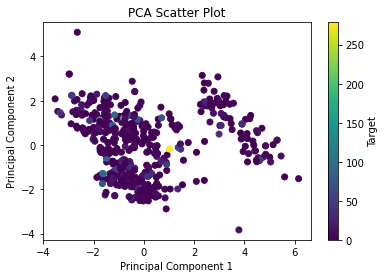

In [24]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Target')
plt.show()

In [25]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



In [10]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)'''

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [27]:
# Function to create the model
def create_model(activation='relu', neurons1=64, neurons2=32):
    model = Sequential()
    model.add(Dense(neurons1, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(neurons2, activation=activation))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [28]:
# Create KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Define the hyperparameters grid
param_grid = {
    'neurons1': [32, 64, 128],
    'neurons2': [16, 32, 64],
    'activation': ['relu', 'tanh', 'sigmoid']
}

<ipython-input-28-dd142afcd056>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)


In [29]:
# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train, y_train)


In [30]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -679.117476 using {'activation': 'sigmoid', 'neurons1': 32, 'neurons2': 64}


In [31]:
# Get the best model
best_model = grid_result.best_estimator_.model

In [32]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

4/4 [==============================] - 0s 4ms/step
Mean Squared Error on Test Set: 1146.851407494955


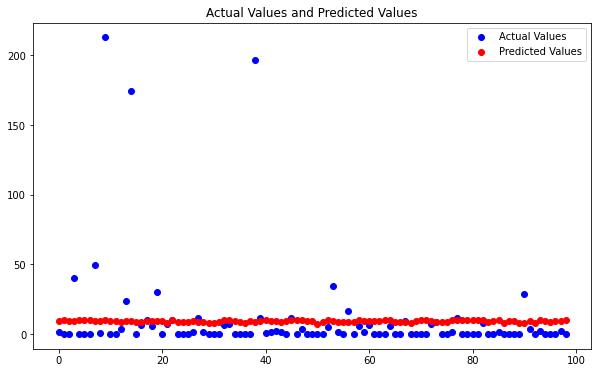

In [40]:
plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values')
plt.title('Actual Values and Predicted Values')

plt.legend()
plt.show()

